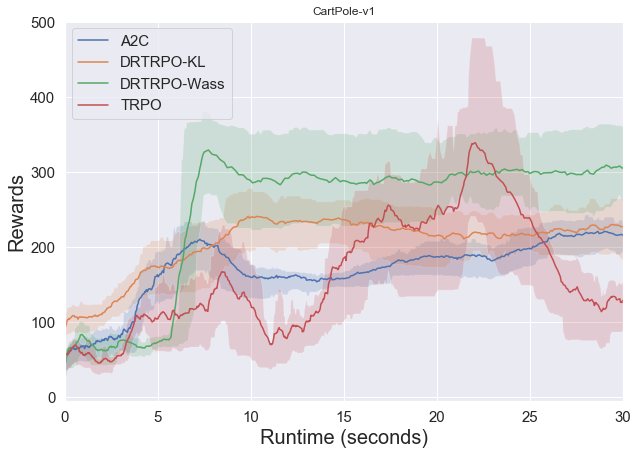

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_list = ['./log_files/a2c/CartPole-v1-1581454864.9365902.csv', './log_files/dr_trpo_kl/CartPole-v1-1581455060.6930969.csv', './log_files/dr_trpo_wass/CartPole-v1-1581454753.241256.csv', './log_files/trpo_original/CartPole-v1-1581417903.39.csv']
window_size = 50
sns.set()

def find_moving_avg(data, window_size):
    quantile1 = np.zeros(len(data)-window_size)
    quantile2 = np.zeros(len(data)-window_size)
    avg = np.zeros(len(data)-window_size)
    for i in range(len(data)-window_size):
        avg[i] = np.mean(data[i:i+window_size])
        quantile1[i] = np.quantile(data[i:i+window_size], 0.25)
        quantile2[i] = np.quantile(data[i:i+window_size], 0.75)
    return avg, quantile1, quantile2
        

fig = plt.figure(figsize=(10,7))
ax = plt.subplot(111)
plt.ylabel('Rewards', fontsize = 20)
plt.xlabel('Runtime (seconds)', fontsize = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.xlim(0,30)
plt.title('CartPole-v1', fontsize = 20)

for name in file_list:
    df=pd.read_csv(name, sep=',',header=None)
    if name.find('a2c') != -1:
        label = 'A2C'
    if name.find('kl') != -1:
        label = 'DRTRPO-KL'
    if name.find('wass') != -1:
        label = 'DRTRPO-Wass'
    if name.find('original') != -1:
        label = 'TRPO'
        
    x_val = df[0]
    y_val = df[1]
    moving_average = find_moving_avg(y_val, window_size)
    ax.plot(x_val[0:len(x_val)-window_size], moving_average[0], label=label)
    ax.fill_between(x_val[0:len(x_val)-window_size], moving_average[1], moving_average[2], alpha=0.2)
    ax.legend(loc='upper left', fontsize = 15)